🎯 Desafio dia 68 — Análise de Desempenho Escolar

📂 Dataset: desafio_dia_68_desempenho_alunos.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Você foi contratado por uma escola para analisar o desempenho dos alunos em diferentes matérias, turnos e provas. O objetivo é entender fatores que influenciam a aprovação.

🛠️ Tarefas do desafio:

Tratamento de dados
- Preencha os valores ausentes na coluna nota_prova1 com a mediana dessa coluna.

- Preencha os valores ausentes em faltas com a moda da coluna.

Análise geral
- Qual matéria possui maior taxa de aprovação?

- Qual o turno com maior média final?

Visualização de dados
- Crie um boxplot comparando a média final dos alunos por turno.

Machine Learning - Classificação
- Crie um modelo de classificação (por exemplo, LogisticRegression) para prever se um aluno será aprovado, com base em:

faltas

media_final

materia (use pd.get_dummies)

Use train_test_split, treine o modelo e exiba a acurácia com accuracy_score.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("desafio_dia_68_desempenho_alunos.csv")
df.head()

,id_aluno,materia,turno,faltas,nota_prova1,nota_prova2,media_final,aprovado
0,1,História,Tarde,2.0,8.3,8.2,8.2,1
1,2,Física,Noite,3.0,NaN,5.8,5.9,0
2,3,História,Manhã,0.0,6.4,7.9,7.2,1
3,4,Física,Noite,1.0,9.3,6.9,8.1,1
4,5,Matemática,Manhã,1.0,6.8,5.5,6.2,1


In [8]:
#Preencha os valores ausentes na coluna nota_prova1 com a mediana dessa coluna.
df["nota_prova1"] = df["nota_prova1"].fillna(df["nota_prova1"].median())

df["faltas"] = df["faltas"].fillna(df["faltas"].mode()[0])
df.head()

,id_aluno,materia,turno,faltas,nota_prova1,nota_prova2,media_final,aprovado
0,1,História,Tarde,2.0,8.3,8.2,8.2,1
1,2,Física,Noite,3.0,6.6,5.8,5.9,0
2,3,História,Manhã,0.0,6.4,7.9,7.2,1
3,4,Física,Noite,1.0,9.3,6.9,8.1,1
4,5,Matemática,Manhã,1.0,6.8,5.5,6.2,1


In [16]:
#Qual matéria possui maior taxa de aprovação?
aprovado = df[df["aprovado"] == 1]
materia_aprovacao = aprovado.groupby("materia")["aprovado"].size() / df.groupby("materia").size() * 100
print(materia_aprovacao)

materia
Biologia      73.972603
Física        78.048780
História      65.853659
Matemática    69.318182
Português     61.333333
dtype: float64


In [17]:
#Qual o turno com maior média final?
turno_maior_mediaFinal = df.groupby("turno")["media_final"].mean()
print(turno_maior_mediaFinal)

turno
Manhã    6.617730
Noite    6.554955
Tarde    6.569595
Name: media_final, dtype: float64


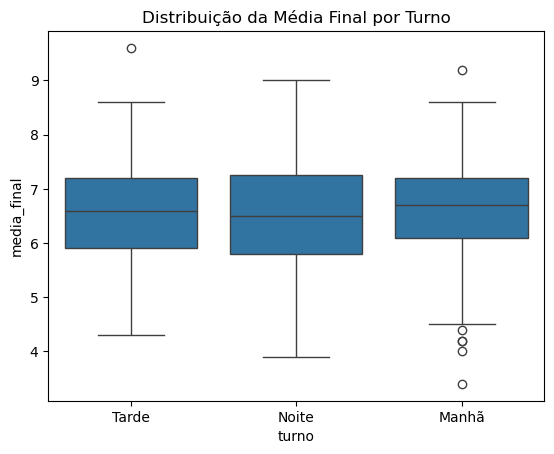

In [19]:
#Crie um boxplot comparando a média final dos alunos por turno.
sns.boxplot(df, x="turno", y="media_final")
plt.title("Distribuição da Média Final por Turno")
plt.show()

In [33]:
#Crie um modelo de classificação (por exemplo, LogisticRegression) para prever se um aluno será aprovado, com base em:
df_dummies = pd.get_dummies(df["materia"], drop_first=True)

X = pd.concat([df[["media_final", "faltas"]], df_dummies], axis=1)
y = df["aprovado"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8333333333333334
